In [30]:
## Cargar las librerias para el trato de la data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

## Leer los datos del archivo csv
kmeansjm = pd.read_csv('Mall_Customers.csv')

## Mostar dataset
print()
print("Confirmar lectura de Dataset y mostrar en pantalla")
print()
kmeansjm.head()


Confirmar lectura de Dataset y mostrar en pantalla



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
## Contar registros iniciales
count_work4 = len(kmeansjm)
print()
print (f"La cantidad de registros iniciales es: {count_work4}")
print()


La cantidad de registros iniciales es: 200



In [32]:
## Buscar datos nulos en el df
resp1 = kmeansjm.isnull().any().any()
print()
print ("Evaluando valores faltantes en el df")
print()
print("¿Existen valores nulos en el df?")
print(f"Rta: {resp1}")
print()


Evaluando valores faltantes en el df

¿Existen valores nulos en el df?
Rta: False



In [33]:
# Descripción de los datos
kmeansjm.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

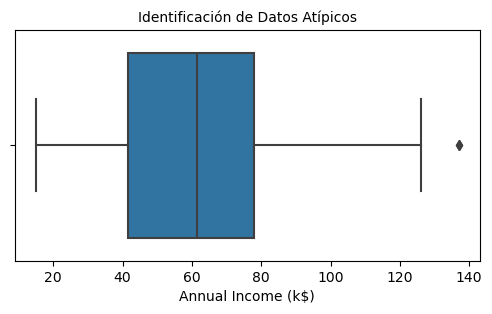

In [34]:
## Procesando validacion de datos atipicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=kmeansjm['Annual Income (k$)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [35]:
## Validando datos null
kmeansjm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [36]:
kmeansjm = kmeansjm[["Age","Annual Income (k$)","Spending Score (1-100)"]]
kmeansjm.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


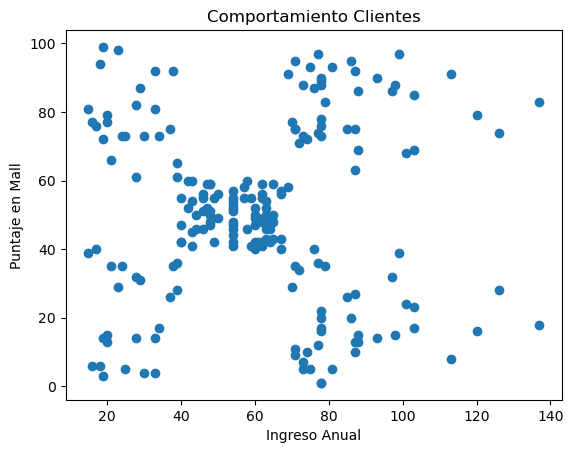

In [37]:
# Grafica antes del agrupamiento
plt.scatter(kmeansjm['Annual Income (k$)'], kmeansjm['Spending Score (1-100)'])
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntaje en Mall')
plt.title('Comportamiento Clientes')
plt.show()

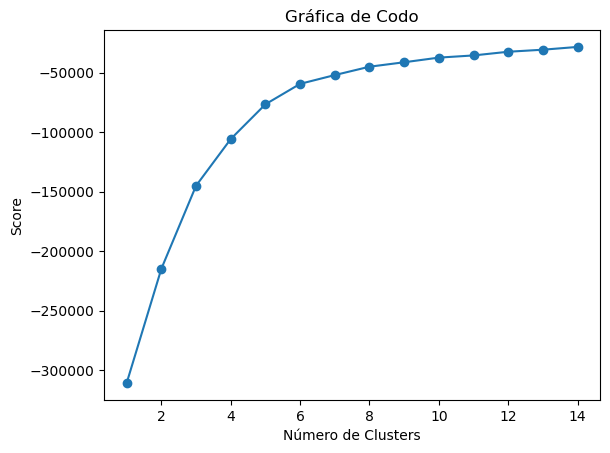

In [50]:
#Se realiza gráfica de codo para identificar valor de K
Nc = range(1, 15)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(kmeansjm).score(kmeansjm) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [54]:
# Generación del modelo de Agrupamiento del modelo con K=8
Modelo = KMeans(n_clusters=6, random_state=0)
Modelo.fit(kmeansjm)

KMeans(n_clusters=6, random_state=0)

In [55]:
#Se agrega la columna Grupo a la BD para identificar el numero de grupo del agrupamiento
Modelo.labels_
kmeansjm["Grupo"] = Modelo.labels_ 
print(kmeansjm)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                  15                      39      5
1     21                  15                      81      4
2     20                  16                       6      5
3     23                  16                      77      4
4     31                  17                      40      5
..   ...                 ...                     ...    ...
195   35                 120                      79      3
196   45                 126                      28      2
197   32                 126                      74      3
198   32                 137                      18      2
199   30                 137                      83      3

[200 rows x 4 columns]


In [56]:
# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(kmeansjm)
X = kmeansjm.drop('Grupo', axis=1)
clusters = kmeansjm['Grupo']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Numero de Observaciones  |        200         |
|  Coeficiente Silhouette  | 0.4523443947724053 |
| Indice Calinski Harabasz | 166.7204931788687  |
|  Indice Davies Bouldin   | 0.7469740072755284 |
+--------------------------+--------------------+


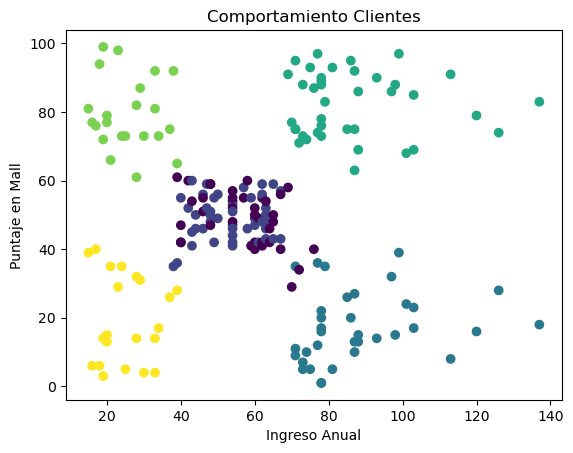

In [57]:
# Grafica antes del agrupamiento
plt.scatter(kmeansjm['Annual Income (k$)'], kmeansjm['Spending Score (1-100)'], c=kmeansjm['Grupo'], cmap='viridis')
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntaje en Mall')
plt.title('Comportamiento Clientes')
plt.show()

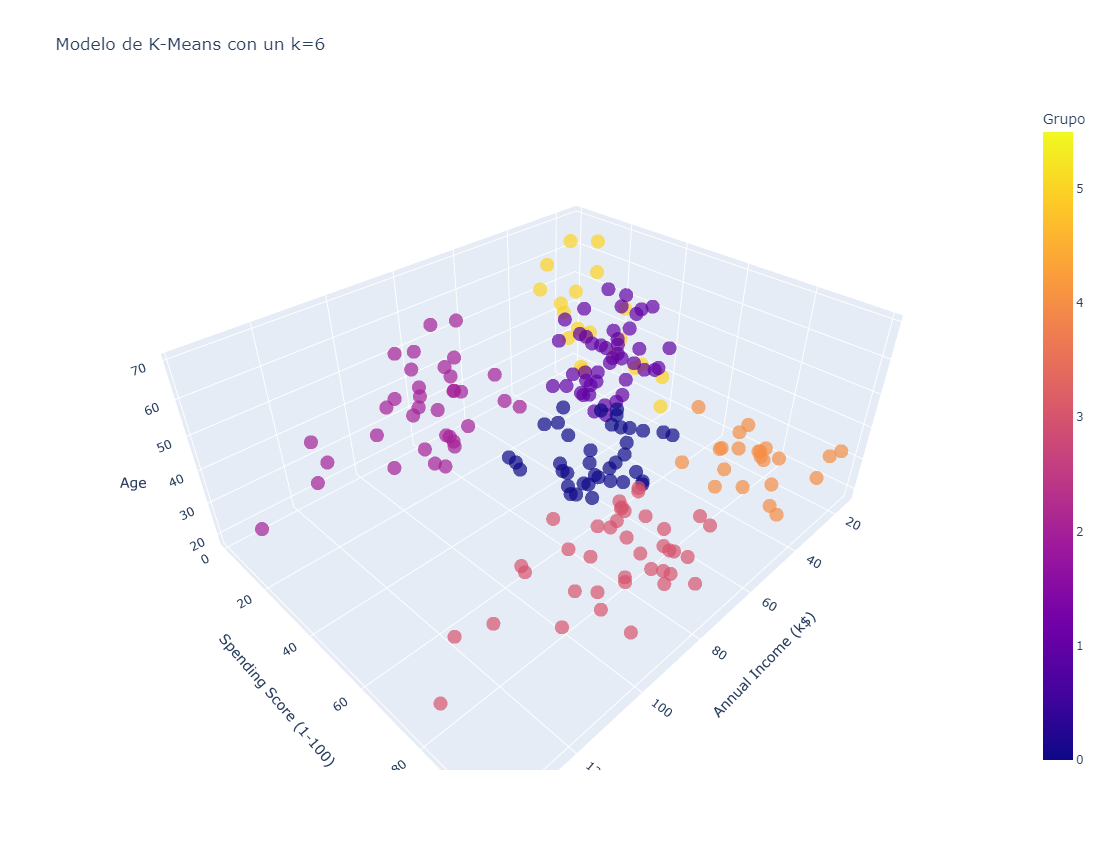

In [59]:
# Crear un modelo 3D de los datos agrupados
Grafica_3D = px.scatter_3d(kmeansjm, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='Grupo', symbol='Grupo', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle'}, opacity=0.7, width=900, height=850, title=f'Modelo de K-Means con un k={6}', labels={'label': 'Cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False)